# ¿Cuál es la mejor tarifa?

La empresa de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Se realizará un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña con 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Se analizará el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Propósito del Proyecto y Plan de Acción**

Este proyecto tiene como objetivo determinar cuál de las tarifas de Megaline, Surf o Ultimate, genera más ingresos promedio. Basandonos en datos de 500 clientes de 2018.

**Pasos clave:**

* Cargar y Preparar Datos: Unificaremos los datos de llamadas, mensajes, internet y usuarios, asegurando la calidad y el formato correcto. Esto incluye calcular los ingresos mensuales de cada cliente.

* Analizar el Comportamiento: Describiremos el uso de minutos, SMS y datos para cada tarifa, calculando promedios y varianzas.

* Probar Hipótesis: Realizaremos pruebas estadísticas para comparar los ingresos de ambas tarifas y los ingresos entre usuarios de Nueva York-Nueva Jersey y otras regiones.

* Conclusión: Resumiremos nuestros hallazgos sobre la mejor tarifa a Megaline.

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("--- Información General de df_plans ---")
df_plans.info()

--- Información General de df_plans ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Imprime una muestra de los datos para las tarifas
print("\n--- Primeras 5 filas de df_plans ---")
print(df_plans.head())


--- Primeras 5 filas de df_plans ---
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


**Análisis Inicial del DataFrame df_plans (Tarifas)**

El DataFrame df_plans contiene la información de precios y servicios incluidos para los planes Surf y Ultimate.

- Valores Ausentes: No se encontraron valores ausentes en ninguna columna.

- Tipos de Datos: Todos los tipos de datos son apropiados para la información que representan (ej., int64 para cantidades y float64 para precios con decimales).

**Observaciones Generales:** La inspección visual de los datos confirma que son consistentes y lógicos según la descripción de cada plan.

**Conclusión:** El DataFrame df_plans está completamente limpio y correctamente formateado, listo para su uso sin necesidad de preprocesamiento adicional.

### Corregir datos

**Coherencia de Datos en df_plans:**

Problema: (No se identificaron problemas) Se revisó df_plans y se confirmó que todos los tipos de datos son correctos y no hay valores ausentes, estando listo para su uso directo.

### Enriquecer los datos

**Agregando Factores Adicionales a df_plans**

- Factor a agregar: gb_per_month_included

- Razón: El plan incluye internet en megabytes (mb_per_month_included), pero el costo por excedente (usd_per_gb) se maneja en gigabytes. Convertir los MB incluidos a GB hará que la información del plan sea más coherente y fácil de interpretar en el contexto de la facturación.

In [ ]:
# Agregar la columna 'gb_per_month_included'
df_plans['gb_per_month_included'] = (df_plans['mb_per_month_included'] / 1024).astype(int)

print("df_plans con el nuevo factor 'gb_per_month_included':")
print(df_plans.head())

df_plans con el nuevo factor 'gb_per_month_included':
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("--- Información General de df_users ---")
df_users.info()

--- Información General de df_users ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios
print("\n--- Primeras 5 filas de df_users ---")
print(df_users.head())


--- Primeras 5 filas de df_users ---
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


**Descripción y Observaciones de df_users**

El DataFrame df_users contiene 500 entradas con información de los clientes. Se observó que las columnas reg_date y churn_date son de tipo object (texto). Además, la columna churn_date presenta numerosos valores ausentes (NaN). Las demás columnas y sus tipos de datos son correctos.

**Problemas y Soluciones:**

- Fechas como Texto: Las columnas reg_date y churn_date deben ser de tipo datetime para permitir análisis temporal.

  - Solución: Convertir ambas columnas a datetime usando pd.to_datetime().
    

- Valores Ausentes en churn_date: Estos NaN no son un error; indican que el usuario estaba activo al momento de la extracción de datos.

  - Solución: No requieren corrección. Se interpretarán como usuarios activos.

### Corregir los datos

Para el DataFrame df_users, en las observaciones iniciales notamos que las columnas de fecha (reg_date y churn_date) están en formato de texto (object) y necesitan ser convertidas a tipo datetime.

In [ ]:
# Corrección para df_users: Convertir columnas de fecha a datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

print("Las columnas 'reg_date' y 'churn_date' de df_users han sido convertidas a tipo datetime.")

Las columnas 'reg_date' y 'churn_date' de df_users han sido convertidas a tipo datetime.


### Enriquecer los datos

**Agregando Factores Adicionales a df_users**

Para enriquecer df_users, añadiremos una columna reg_month. Esto nos permitirá analizar la distribución de registros por mes, lo cual podría ser útil para futuros análisis de estacionalidad o comportamiento del usuario.

In [ ]:
# Agregar una columna 'reg_month' a df_users
# Extraemos el mes de la fecha de registro
df_users['reg_month'] = df_users['reg_date'].dt.month

print("Columna 'reg_month' agregada a df_users.")

Columna 'reg_month' agregada a df_users.


## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("--- Información General de df_calls ---")
df_calls.info()

--- Información General de df_calls ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Imprime una muestra de datos para las llamadas
print("\n--- Primeras 5 filas de df_calls ---")
print(df_calls.head())



--- Primeras 5 filas de df_calls ---
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


**Observaciones Clave:**

El DataFrame df_calls contiene 137,735 registros de llamadas. call_date es de tipo object y duration es float64, mientras que user_id es correcto (int64). No se encontraron valores ausentes. Las duraciones de 0.00 minutos son aceptables (llamadas perdidas/cortas).

**Problemas y Soluciones:**

- Fecha como Texto: call_date necesita ser tipo datetime.

  - Solución: Convertir call_date usando pd.to_datetime().

- Duración con Decimales: duration debe redondearse al minuto entero superior para la facturación.

  - Solución: Aplicar numpy.ceil() y luego convertir a int.

### Corregir los datos

Basándonos en nuestras observaciones iniciales, las correcciones para df_calls son:
- Convertir call_date a datetime: Esto es esencial para cualquier análisis temporal, incluyendo la agrupación por mes.

- Redondear duration y convertir a entero: Como Megaline factura las llamadas redondeando cada una hacia arriba al minuto más cercano, debemos aplicar esta lógica a la columna duration.

In [ ]:
# Correcciones para df_calls:
# 1. Convertir 'call_date' a tipo datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# 2. Redondear 'duration' hacia arriba y convertir a entero
# np.ceil() redondea hacia arriba; .astype(int) convierte a entero
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

print("df_calls: 'call_date' convertido a datetime y 'duration' redondeado y convertido a entero.")

df_calls: 'call_date' convertido a datetime y 'duration' redondeado y convertido a entero.


### Enriquecer los datos

El factor adicional más útil para df_calls es extraer el mes de la actividad. Esto es absolutamente necesario para agrupar el uso de los usuarios por meses de facturación, lo cual es fundamental para calcular los ingresos mensuales.

In [ ]:
# Enriquecimiento para df_calls:
# Agregar la columna 'month' extrayendo el mes de 'call_date'
df_calls['month'] = df_calls['call_date'].dt.month

print("df_calls: Columna 'month' agregada para identificar el mes de cada llamada.")

df_calls: Columna 'month' agregada para identificar el mes de cada llamada.


## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("--- Información General de df_messages ---")
df_messages.info()

--- Información General de df_messages ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes
print("\n--- Primeras 5 filas de df_messages ---")
print(df_messages.head())


--- Primeras 5 filas de df_messages ---
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


**Observaciones Clave:**

El DataFrame df_messages contiene 76,051 registros de mensajes. La columna message_date es de tipo object (texto), mientras que user_id es int64, lo cual es correcto. No se encontraron valores ausentes. La columna id es un identificador único para cada mensaje.

**Problemas y Soluciones:**

- Fecha como Texto: message_date es de tipo object y necesita ser convertida a un formato de fecha para facilitar el análisis temporal (ej. agrupar por mes).
  - Solución: Convertir message_date a tipo datetime usando pd.to_datetime().

### Corregir los datos

Basándonos en nuestras observaciones, la principal corrección para df_messages es:

- Convertir message_date a datetime: Esto es esencial para poder agrupar los mensajes por mes, lo cual es fundamental para los cálculos de ingresos.

In [ ]:
# Convertir 'message_date' a tipo datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

print("df_messages: 'message_date' convertido a datetime.")

df_messages: 'message_date' convertido a datetime.


### Enriquecer los datos

Al igual que con df_calls, el factor adicional más útil para df_messages es extraer el mes de la actividad. Esto nos permitirá consolidar el número de mensajes enviados por cada usuario en cada mes.

In [ ]:
# Enriquecimiento para df_messages:
# Agregar la columna 'month' extrayendo el mes de 'message_date'
df_messages['month'] = df_messages['message_date'].dt.month

print("df_messages: Columna 'month' agregada para identificar el mes de cada mensaje.")

df_messages: Columna 'month' agregada para identificar el mes de cada mensaje.


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("--- Información General de df_internet ---")
df_internet.info()


--- Información General de df_internet ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
print("\n--- Primeras 5 filas de df_internet ---")
print(df_internet.head())



--- Primeras 5 filas de df_internet ---
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


**Observaciones Clave:**

El DataFrame df_internet contiene 104,825 registros de sesiones de internet. La columna session_date es de tipo object (texto) y mb_used es float64. user_id es int64, lo cual es correcto. No se encontraron valores ausentes. La columna mb_used muestra un valor mínimo de 0.00 MB, que es aceptable (sesiones sin consumo significativo).

**Problemas y Soluciones:**

- Fecha como Texto: session_date necesita ser tipo datetime.
  - Solución: Convertir session_date a tipo datetime usando pd.to_datetime().

Redondeo de Datos: Es crucial recordar que los megabytes se redondean a gigabytes mensualmente, no por sesión individual. Esta lógica se aplicará en el paso de cálculo de ingresos, no en la corrección inicial de esta columna.

### Corregir los datos

La principal corrección para df_internet es:

- Convertir session_date a datetime: Esto es fundamental para agrupar el uso de datos por mes.


In [ ]:
#Convertir 'session_date' a tipo datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

print("df_internet: 'session_date' convertido a datetime.")

df_internet: 'session_date' convertido a datetime.


### Enriquecer los datos

Para poder calcular el consumo mensual de datos por usuario, necesitamos extraer el mes de la actividad en una nueva columna.

In [ ]:
# Agregar la columna 'month' extrayendo el mes de 'session_date'
df_internet['month'] = df_internet['session_date'].dt.month

print("df_internet: Columna 'month' agregada para identificar el mes de cada sesión.")

df_internet: Columna 'month' agregada para identificar el mes de cada sesión.


## Estudiar las condiciones de las tarifas

Es fundamental tener claridad absoluta sobre cómo se cobra a los usuarios para poder calcular correctamente sus ingresos.

**Reglas de Facturación Cruciales:**

Llamadas: Cada llamada individual se redondea hacia arriba al minuto más cercano (ej., 1 segundo se cobra como 1 minuto).

Datos: El total del mes de MB se redondea hacia arriba al gigabyte más cercano (ej., 1025 MB se cobran como 2 GB). Recordar que 1 GB = 1024 MB.

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print("\n--- Detalles de las tarifas de Megaline ---")
print(df_plans)


--- Detalles de las tarifas de Megaline ---
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Agregar datos por usuario

Ahora que nuestros DataFrames están limpios y enriquecidos con la columna month, podemos proceder a agregar los datos para obtener el consumo mensual por cada usuario. Esto es un paso fundamental antes de calcular los ingresos.

Vamos a calcular las siguientes métricas para cada usuario por mes:

- Número de llamadas realizadas.
- Cantidad de minutos usados.
- Número de mensajes enviados.
- Volumen del tráfico de Internet usado.

In [ ]:
#Calcular el número de llamadas hechas por cada usuario al mes
calls_per_month = df_calls.groupby(['user_id', 'month']).agg(calls=('id', 'count')).reset_index()
print("Número de llamadas por usuario y mes:")
print(calls_per_month.head())
print("-" * 50)

Número de llamadas por usuario y mes:
   user_id  month  calls
0     1000     12     16
1     1001      8     27
2     1001      9     49
3     1001     10     65
4     1001     11     64
--------------------------------------------------


In [ ]:
#Calcular la cantidad de minutos usados por cada usuario al mes
minutes_per_month = df_calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum')).reset_index()
print("Minutos usados por usuario y mes:")
print(minutes_per_month.head())
print("-" * 50)

Minutos usados por usuario y mes:
   user_id  month  minutes
0     1000     12      124
1     1001      8      182
2     1001      9      315
3     1001     10      393
4     1001     11      426
--------------------------------------------------


In [ ]:
#Calcular el número de mensajes enviados por cada usuario al mes
messages_per_month = df_messages.groupby(['user_id', 'month']).agg(messages=('id', 'count')).reset_index()
print("Número de mensajes por usuario y mes:")
print(messages_per_month.head())
print("-" * 50)

Número de mensajes por usuario y mes:
   user_id  month  messages
0     1000     12        11
1     1001      8        30
2     1001      9        44
3     1001     10        53
4     1001     11        36
--------------------------------------------------


In [ ]:
#Calcular el volumen del tráfico de Internet usado por cada usuario al mes
internet_per_month = df_internet.groupby(['user_id', 'month']).agg(mb_used=('mb_used', 'sum')).reset_index()
print("Volumen de tráfico de Internet (MB) por usuario y mes:")
print(internet_per_month.head())
print("-" * 50)

Volumen de tráfico de Internet (MB) por usuario y mes:
   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30
--------------------------------------------------


**Unir los Datos Agregados en un Solo DataFrame**

Ahora que tenemos las métricas mensuales por separado, el siguiente paso es fusionarlas en un único DataFrame. Esto nos dará una vista consolidada del consumo de cada usuario por mes.

Comenzaremos fusionando calls_per_month y minutes_per_month, luego agregaremos messages_per_month y finalmente internet_per_month. Usaremos outer merge para asegurarnos de no perder ningún usuario o mes, incluso si no tuvieron actividad en alguna categoría (ej., un usuario que no envió mensajes en un mes).

**Añadir la Información de la Tarifa**

Para poder calcular los ingresos, necesitamos saber a qué plan pertenece cada usuario y cuáles son las condiciones de ese plan. Fusionaremos user_monthly_data con df_users (para obtener el plan_name) y luego con df_plans (para obtener todos los detalles de la tarifa).

In [ ]:
# Fusionar llamadas y minutos
user_monthly_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')

# Fusionar con mensajes
user_monthly_data = pd.merge(user_monthly_data, messages_per_month, on=['user_id', 'month'], how='outer')

# Fusionar con internet
user_monthly_data = pd.merge(user_monthly_data, internet_per_month, on=['user_id', 'month'], how='outer')

# Rellenar los valores NaN (donde un usuario no tuvo actividad en una categoría en un mes) con 0
user_monthly_data = user_monthly_data.fillna(0)

# Asegurarse de que las columnas de conteo/suma sean de tipo entero si es apropiado
user_monthly_data['calls'] = user_monthly_data['calls'].astype(int)
user_monthly_data['minutes'] = user_monthly_data['minutes'].astype(int)
user_monthly_data['messages'] = user_monthly_data['messages'].astype(int)

print("\nDataFrame consolidado de uso mensual por usuario:")
print(user_monthly_data.head())
print("\nInformación general del DataFrame consolidado:")
user_monthly_data.info()


DataFrame consolidado de uso mensual por usuario:
   user_id  month  calls  minutes  messages   mb_used
0     1000     12     16      124        11   1901.47
1     1001      8     27      182        30   6919.15
2     1001      9     49      315        44  13314.82
3     1001     10     65      393        53  22330.49
4     1001     11     64      426        36  18504.30

Información general del DataFrame consolidado:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   calls     2293 non-null   int64  
 3   minutes   2293 non-null   int64  
 4   messages  2293 non-null   int64  
 5   mb_used   2293 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 125.4 KB


In [ ]:
# Añadir el nombre del plan a user_monthly_data desde df_users
user_monthly_data = pd.merge(user_monthly_data, df_users[['user_id', 'plan']], on='user_id', how='left', suffixes=('', '_user'))

# Añadir los detalles completos del plan desde df_plans
user_monthly_data = pd.merge(user_monthly_data, df_plans, left_on='plan', right_on='plan_name', how='left', suffixes=('', '_plan'))

print("\nDataFrame consolidado con información del plan:")
print(user_monthly_data.head())
print("\nInformación general del DataFrame consolidado con planes:")
user_monthly_data.info()


DataFrame consolidado con información del plan:
   user_id  month  calls  minutes  messages   mb_used      plan  \
0     1000     12     16      124        11   1901.47  ultimate   
1     1001      8     27      182        30   6919.15      surf   
2     1001      9     49      315        44  13314.82      surf   
3     1001     10     65      393        53  22330.49      surf   
4     1001     11     64      426        36  18504.30      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               70           7             0.01            0.01  ultimate   
1  

Necesitamos calcular el costo adicional por minutos, mensajes y datos, y luego sumarlo a la tarifa mensual del plan.

Reglas de facturación a recordar:
- Llamadas: Redondeadas por llamada hacia arriba (ya hecho en df_calls). Aquí solo sumamos los minutos.
- Datos: El total mensual de MB se redondea hacia arriba al GB más cercano. (1 GB = 1024 MB)

In [ ]:
# Convertir mb_used de MB a GB para el cálculo de ingresos, redondeando hacia arriba el total mensual
# Primero, dividimos por 1024 para obtener GB, luego redondeamos hacia arriba con np.ceil
user_monthly_data['gb_used'] = np.ceil(user_monthly_data['mb_used'] / 1024).astype(int)

# Calcular el ingreso mensual para cada usuario
def calculate_monthly_revenue(row):
    revenue = row['usd_monthly_pay']

    # Calcular minutos excedentes
    if row['minutes'] > row['minutes_included']:
        extra_minutes = row['minutes'] - row['minutes_included']
        revenue += extra_minutes * row['usd_per_minute']

    # Calcular mensajes excedentes
    if row['messages'] > row['messages_included']:
        extra_messages = row['messages'] - row['messages_included']
        revenue += extra_messages * row['usd_per_message']

    # Calcular GB excedentes (ya redondeados a GB en 'gb_used')
    if row['gb_used'] > row['mb_per_month_included'] / 1024: # Convertir mb_per_month_included a GB para la comparación
        extra_gb = row['gb_used'] - (row['mb_per_month_included'] / 1024)
        revenue += extra_gb * row['usd_per_gb']

    return revenue

# Aplicar la función para calcular el ingreso mensual
user_monthly_data['monthly_revenue'] = user_monthly_data.apply(calculate_monthly_revenue, axis=1)

print("\nDataFrame final con el ingreso mensual por usuario:")
print(user_monthly_data.head())
print("\nEstadísticas descriptivas del ingreso mensual:")
print(user_monthly_data['monthly_revenue'].describe())


DataFrame final con el ingreso mensual por usuario:
   user_id  month  calls  minutes  messages   mb_used      plan  \
0     1000     12     16      124        11   1901.47  ultimate   
1     1001      8     27      182        30   6919.15      surf   
2     1001      9     49      315        44  13314.82      surf   
3     1001     10     65      393        53  22330.49      surf   
4     1001     11     64      426        36  18504.30      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               70           7             0.01            0.01  ultimate   

## Estudia el comportamiento de usuario

Procederemos a estudiar el comportamiento de los clientes de Megaline.

  El objetivo principal es comparar el consumo de servicios (llamadas, mensajes, tráfico de internet) entre los usuarios de los planes Surf y Ultimate. Esto nos permitirá identificar diferencias clave en cómo los usuarios utilizan sus respectivas tarifas y servirá de base para determinar la rentabilidad de cada plan.

Para cada categoría de servicio, realizaremos el siguiente análisis:

- **Cálculo y Visualización del Promedio Mensual:** Calcularemos el promedio de uso por plan y mes, visualizándolo con un **gráfico de barras** para identificar tendencias temporales.

- **Distribución del Uso Mensual:** Examinaremos la distribución general del consumo mensual para cada plan mediante un **histograma**, lo que nos ayudará a entender las frecuencias de uso y el patrón de consumo predominante.

- **Estadísticas Descriptivas Clave:** Cuantificaremos las diferencias en el comportamiento calculando **la media y la varianza** del uso mensual por cada plan. La varianza (y su desviación estándar) indicará la dispersión de los datos.

- **Visualización de la Distribución (Boxplot):** Utilizaremos un diagrama de caja (boxplot) para visualizar de forma concisa **la distribución, la mediana, los cuartiles y la presencia de valores atípicos,** facilitando la comparación entre planes.

Al final de cada sección de análisis (llamadas, mensajes, internet), elaboraremos conclusiones específicas sobre si el comportamiento de los usuarios varía en función del plan, basándonos en estas métricas y visualizaciones.

### Llamadas

Duración promedio de llamadas por plan y mes:
        plan  month     minutes
0       surf      1  203.000000
1       surf      2  297.000000
2       surf      3  330.000000
3       surf      4  351.540000
4       surf      5  399.584416
5       surf      6  431.298969
6       surf      7  449.983471
7       surf      8  410.111111
8       surf      9  414.226804
9       surf     10  429.729958
10      surf     11  423.325088
11      surf     12  473.836478
12  ultimate      1  193.500000
13  ultimate      2  403.142857
14  ultimate      3  304.250000
15  ultimate      4  336.857143
16  ultimate      5  406.241379
17  ultimate      6  370.957447
18  ultimate      7  427.067797
19  ultimate      8  421.436620
20  ultimate      9  437.511628
21  ultimate     10  450.735849
22  ultimate     11  445.196850
23  ultimate     12  459.099338


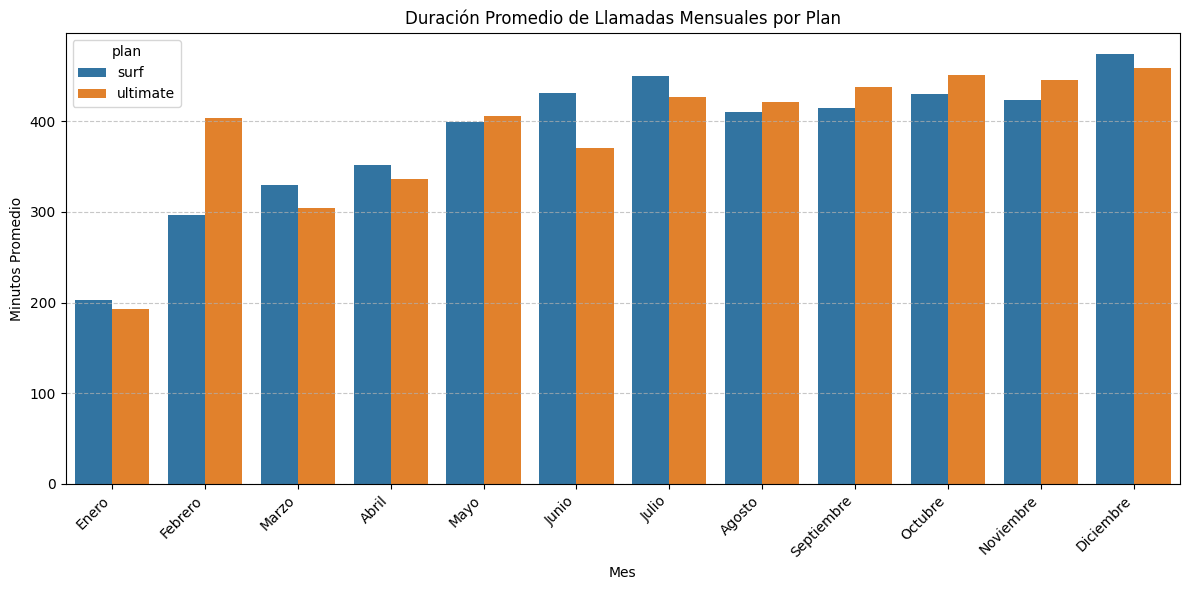

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes.
# Agrupamos por plan y month, y luego calculamos la media de 'minutes'
avg_minutes_per_plan_month = user_monthly_data.groupby(['plan', 'month'])['minutes'].mean().reset_index()

print("Duración promedio de llamadas por plan y mes:")
print(avg_minutes_per_plan_month)

# Traza un gráfico de barras para visualizarla.
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='minutes', hue='plan', data=avg_minutes_per_plan_month)
plt.title('Duración Promedio de Llamadas Mensuales por Plan')
plt.xlabel('Mes')
plt.ylabel('Minutos Promedio')
plt.xticks(ticks=range(0,12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

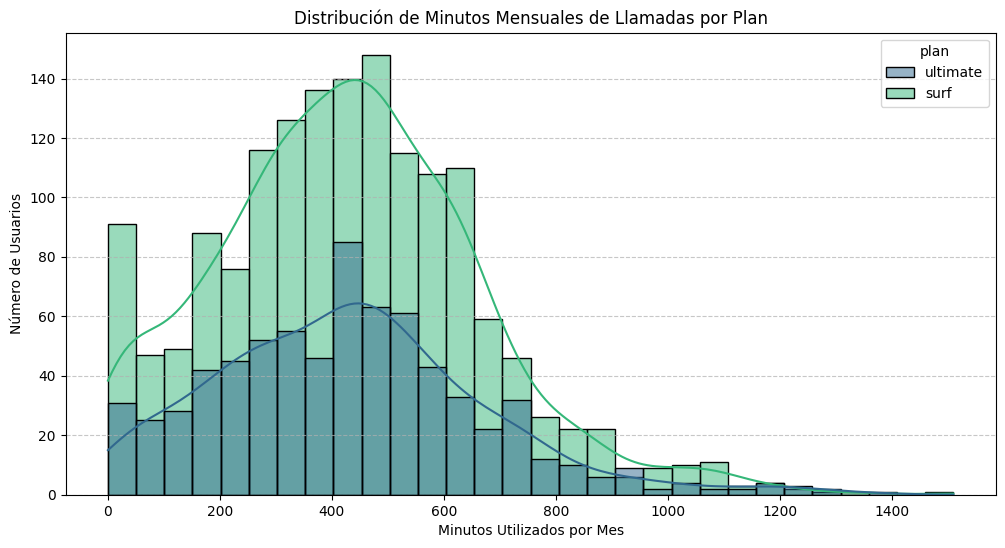

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan.
# Traza un histograma.
plt.figure(figsize=(12, 6))
sns.histplot(data=user_monthly_data, x='minutes', hue='plan', kde=True, bins=30, palette='viridis')
plt.title('Distribución de Minutos Mensuales de Llamadas por Plan')
plt.xlabel('Minutos Utilizados por Mes')
plt.ylabel('Número de Usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas por plan
mean_minutes_per_plan = user_monthly_data.groupby('plan')['minutes'].mean()
variance_minutes_per_plan = user_monthly_data.groupby('plan')['minutes'].var()
std_minutes_per_plan = user_monthly_data.groupby('plan')['minutes'].std()


print("\nMedia de minutos mensuales de llamadas por plan:")
print(mean_minutes_per_plan)
print("\n")

print("Varianza de minutos mensuales de llamadas por plan:")
print(variance_minutes_per_plan)
print("\n")

print("Desviación estándar de minutos mensuales de llamadas por plan:")
print(std_minutes_per_plan)
print("\n")


Media de minutos mensuales de llamadas por plan:
plan
surf        428.749523
ultimate    430.450000
Name: minutes, dtype: float64


Varianza de minutos mensuales de llamadas por plan:
plan
surf        54968.279461
ultimate    57844.464812
Name: minutes, dtype: float64


Desviación estándar de minutos mensuales de llamadas por plan:
plan
surf        234.453150
ultimate    240.508762
Name: minutes, dtype: float64




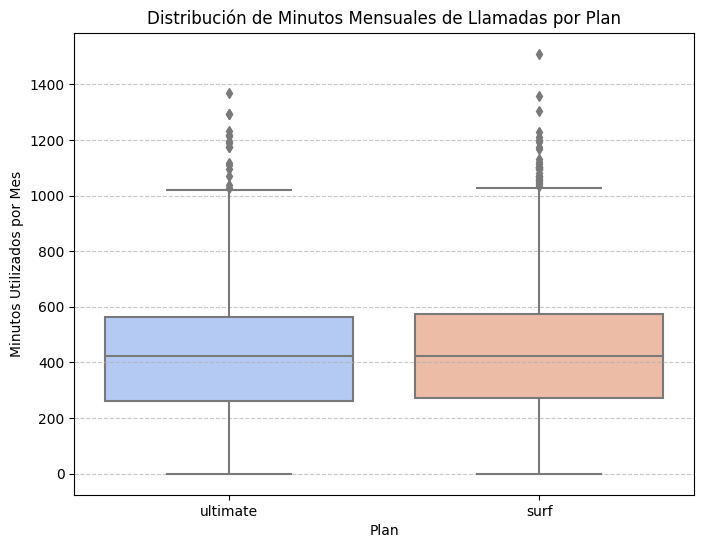

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='minutes', data=user_monthly_data, palette='coolwarm')
plt.title('Distribución de Minutos Mensuales de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos Utilizados por Mes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Análisis del comportamiento de llamadas por plan:**

Al observar los gráficos y las estadísticas descriptivas para el uso de minutos mensuales, se aprecian las siguientes características:

- **Promedio y Mediana:** Tanto la duración promedio de llamadas mensuales como la mediana son muy similares para ambos planes (Surf y Ultimate). Esto sugiere que, en promedio, los usuarios de ambos planes consumen una cantidad parecida de minutos al mes.

- **Variabilidad y Dispersión:** Contrario a lo que se podría esperar por los límites del plan, la varianza y la desviación estándar de los minutos son también muy similares entre ambos planes, con el plan Ultimate mostrando incluso una dispersión ligeramente mayor. Esto indica que la variabilidad en el uso de minutos no difiere sustancialmente entre los suscriptores de Surf y Ultimate.

- **Distribución:** Ambos planes presentan una distribución del uso de minutos sesgada a la derecha, lo que significa que la mayoría de los usuarios utilizan un rango medio-bajo de minutos, pero hay una cola de usuarios que consumen muchos más.

- **Valores Atípicos (Outliers):** Ambos diagramas de caja revelan una cantidad significativa de valores atípicos en el extremo superior para ambos planes. Esto significa que, tanto en Surf como en Ultimate, existen usuarios con un consumo de minutos excepcionalmente alto que se desvía del uso promedio.

**Conclusión sobre el comportamiento en llamadas:**

El comportamiento de los usuarios no varía drásticamente en función del plan en términos de la cantidad promedio o la dispersión del uso. La media, mediana, varianza y desviación estándar de los minutos mensuales son muy parecidas para los usuarios de Surf y Ultimate. Aunque el plan Ultimate ofrece un límite de minutos mucho más alto, sus usuarios no lo utilizan en mayor medida que los de Surf en promedio. Los usuarios de ambos planes muestran un patrón de uso similar, con una cola de "grandes consumidores" que exceden los promedios. La principal diferencia, por lo tanto, no reside en cuánto usan en promedio, sino en si ese uso los lleva a exceder los límites de su plan y generar costos adicionales, lo cual será clave en el cálculo de ingresos.

### Mensajes

Número promedio de mensajes por plan y mes:
        plan  month   messages
0       surf      1  10.500000
1       surf      2  12.000000
2       surf      3  15.260870
3       surf      4  17.400000
4       surf      5  24.012987
5       surf      6  25.298969
6       surf      7  27.033058
7       surf      8  28.777778
8       surf      9  30.762887
9       surf     10  33.839662
10      surf     11  32.385159
11      surf     12  38.600629
12  ultimate      1  15.500000
13  ultimate      2  21.571429
14  ultimate      3  20.250000
15  ultimate      4  22.047619
16  ultimate      5  32.103448
17  ultimate      6  29.340426
18  ultimate      7  32.830508
19  ultimate      8  38.478873
20  ultimate      9  37.895349
21  ultimate     10  39.443396
22  ultimate     11  38.606299
23  ultimate     12  45.006623


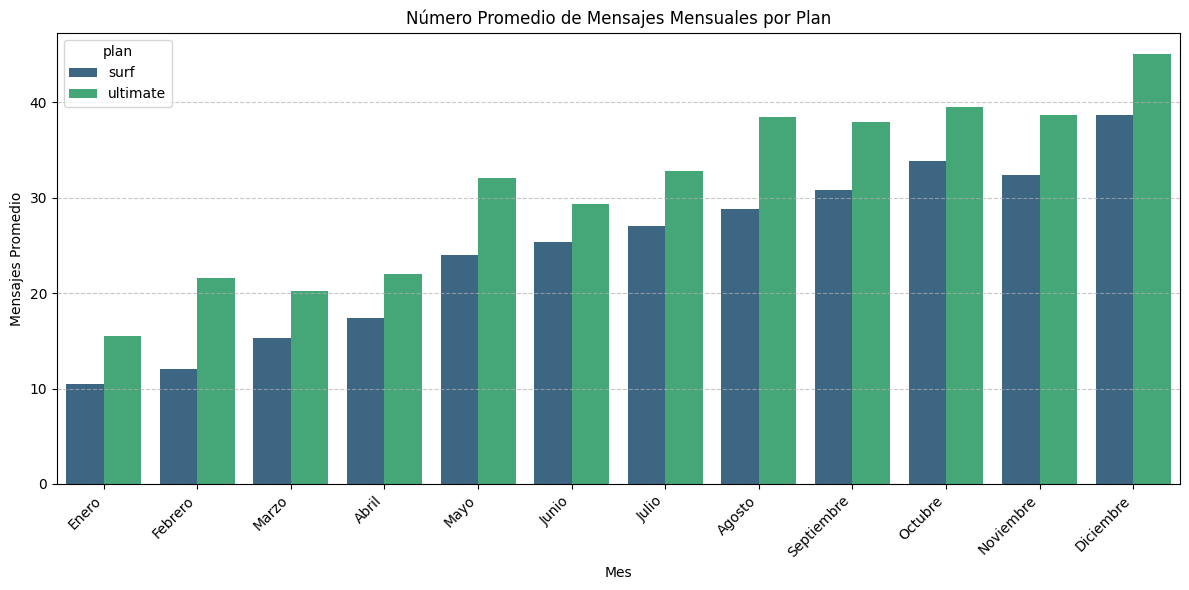

In [ ]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan.
# Agrupamos por plan y month, luego calculamos la media de 'messages'
avg_messages_per_plan_month = user_monthly_data.groupby(['plan', 'month'])['messages'].mean().reset_index()

print("Número promedio de mensajes por plan y mes:")
print(avg_messages_per_plan_month)

# Traza un gráfico de barras para visualizarla.
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='messages', hue='plan', data=avg_messages_per_plan_month, palette='viridis')
plt.title('Número Promedio de Mensajes Mensuales por Plan')
plt.xlabel('Mes')
plt.ylabel('Mensajes Promedio')
plt.xticks(ticks=range(0,12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


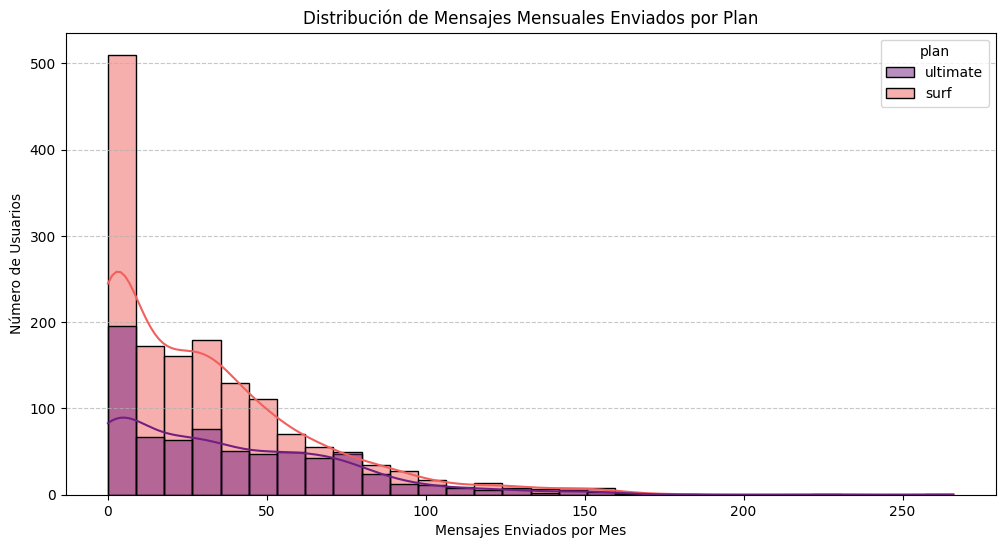

In [ ]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan.
# Traza un histograma.
plt.figure(figsize=(12, 6))
sns.histplot(data=user_monthly_data, x='messages', hue='plan', kde=True, bins=30, palette='magma')
plt.title('Distribución de Mensajes Mensuales Enviados por Plan')
plt.xlabel('Mensajes Enviados por Mes')
plt.ylabel('Número de Usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


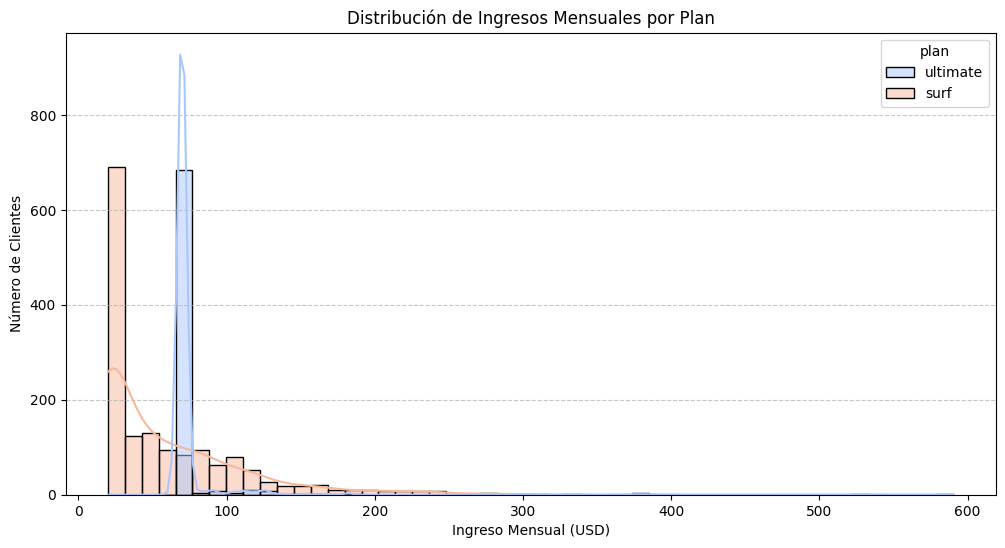

In [ ]:
# Histograma de la distribución de ingresos mensuales por plan
plt.figure(figsize=(12, 6))
sns.histplot(data=user_monthly_data, x='monthly_revenue', hue='plan', kde=True, bins=50, palette='coolwarm')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Ingreso Mensual (USD)')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Calcula la media y la varianza de la cantidad mensual de mensajes por plan
mean_messages_per_plan = user_monthly_data.groupby('plan')['messages'].mean()
variance_messages_per_plan = user_monthly_data.groupby('plan')['messages'].var()
std_messages_per_plan = user_monthly_data.groupby('plan')['messages'].std()

print("\nMedia de mensajes mensuales por plan:")
print(mean_messages_per_plan)
print("\n")

print("Varianza de mensajes mensuales por plan:")
print(variance_messages_per_plan)
print("\n")

print("Desviación estándar de mensajes mensuales por plan:")
print(std_messages_per_plan)
print("\n")


Media de mensajes mensuales por plan:
plan
surf        31.159568
ultimate    37.551389
Name: messages, dtype: float64


Varianza de mensajes mensuales por plan:
plan
surf        1126.724522
ultimate    1208.756744
Name: messages, dtype: float64


Desviación estándar de mensajes mensuales por plan:
plan
surf        33.566717
ultimate    34.767179
Name: messages, dtype: float64




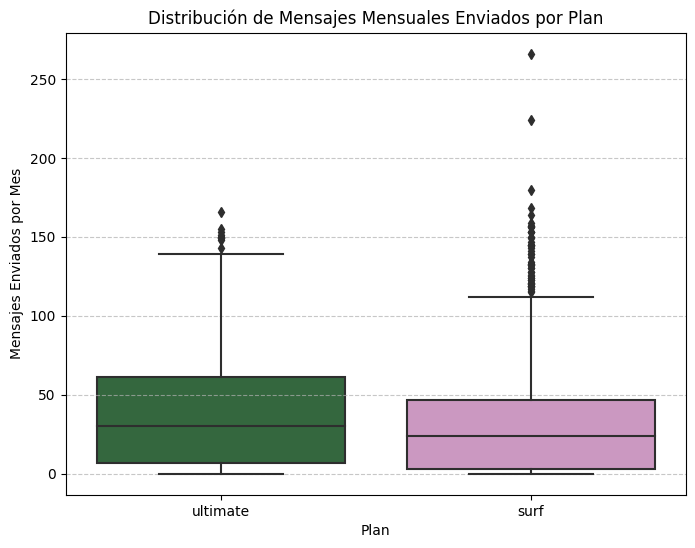

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de mensajes
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='messages', data=user_monthly_data, palette='cubehelix')
plt.title('Distribución de Mensajes Mensuales Enviados por Plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes Enviados por Mes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Análisis del Comportamiento de Mensajes por Plan**

- **Gráfico de barras (Promedio Mensual):** El plan Ultimate promedia ligeramente más mensajes que Surf en la mayoría de los meses, con ambos aumentando hacia fin de año.

- **Histograma (Distribución Mensual):** Ambas distribuciones están fuertemente sesgadas al bajo uso. Surf muestra un pico muy alto en mensajes bajos, mientras que Ultimate se extiende un poco más en rangos medios-bajos.

- **Estadísticas Descriptivas:** La media de mensajes es más alta para Ultimate (37.55 vs 31.16). La varianza es similar para ambos, con Ultimate ligeramente más alta (1208 vs 1126).

- **Diagrama de Caja (Boxplot):** La mediana y el rango intercuartílico (IQR) son más altos para Ultimate. Ambos planes presentan numerosos valores atípicos de alto consumo.

**Conclusión sobre el Comportamiento de Mensajes**

El análisis de mensajes muestra que **los usuarios de Ultimate envían más mensajes en promedio que los de Surf**, aunque la variabilidad en el uso es similar para ambos planes. Ambas distribuciones están **fuertemente sesgadas hacia el bajo consumo**, pero existen usuarios con un volumen de mensajes extremadamente alto (outliers) en ambos planes. La diferencia crucial radica en **los límites del plan:** el generoso límite de Ultimate (1000 mensajes) significa que los usuarios rara vez incurren en cargos adicionales, mientras que el bajo límite de **Surf (50 mensajes) probablemente genera más ingresos por excedentes a pesar de un menor uso promedio.**

### Internet

Volumen promedio de tráfico de Internet (GB) por plan y mes:
        plan  month    gb_used
0       surf      1   5.000000
1       surf      2  12.222222
2       surf      3  13.565217
3       surf      4  12.220000
4       surf      5  14.116883
5       surf      6  15.484536
6       surf      7  16.876033
7       surf      8  16.882716
8       surf      9  16.690722
9       surf     10  17.409283
10      surf     11  16.431095
11      surf     12  18.238994
12  ultimate      1   7.250000
13  ultimate      2  17.285714
14  ultimate      3  18.416667
15  ultimate      4  16.333333
16  ultimate      5  16.862069
17  ultimate      6  15.425532
18  ultimate      7  16.491525
19  ultimate      8  17.845070
20  ultimate      9  17.011628
21  ultimate     10  17.716981
22  ultimate     11  17.118110
23  ultimate     12  18.397351


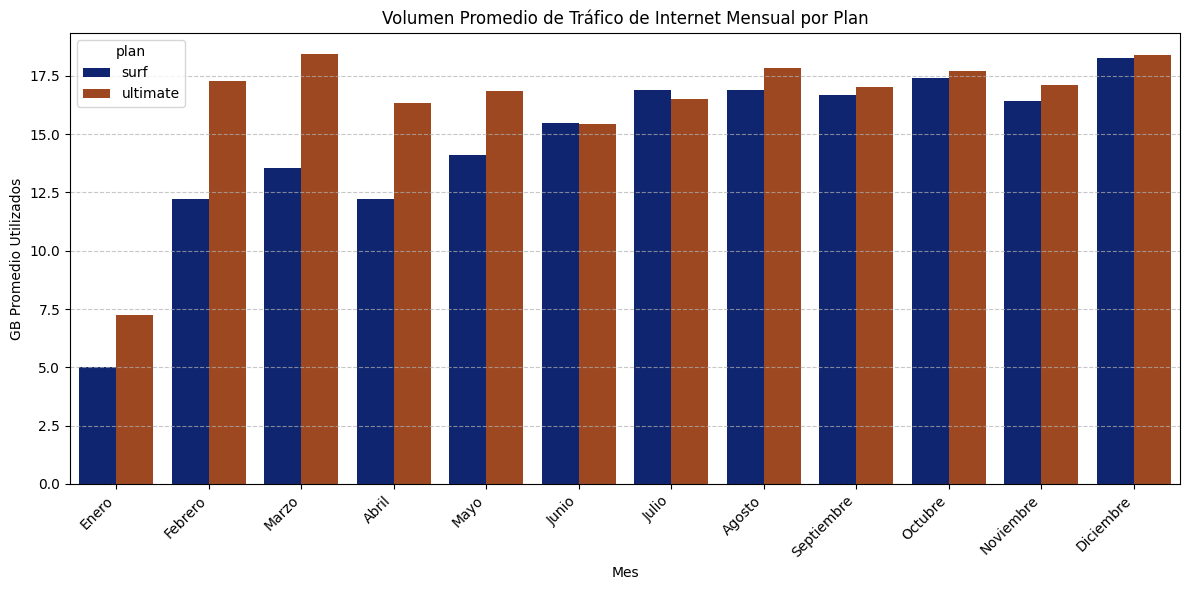

In [ ]:
# Compara el volumen promedio de tráfico de Internet por cada plan y por cada mes.
# Agrupamos por plan y month, luego calculamos la media de 'gb_used'
avg_gb_per_plan_month = user_monthly_data.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

print("Volumen promedio de tráfico de Internet (GB) por plan y mes:")
print(avg_gb_per_plan_month)

# Traza un gráfico de barras para visualizarla.
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='gb_used', hue='plan', data=avg_gb_per_plan_month, palette='dark')
plt.title('Volumen Promedio de Tráfico de Internet Mensual por Plan')
plt.xlabel('Mes')
plt.ylabel('GB Promedio Utilizados')
plt.xticks(ticks=range(0,12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

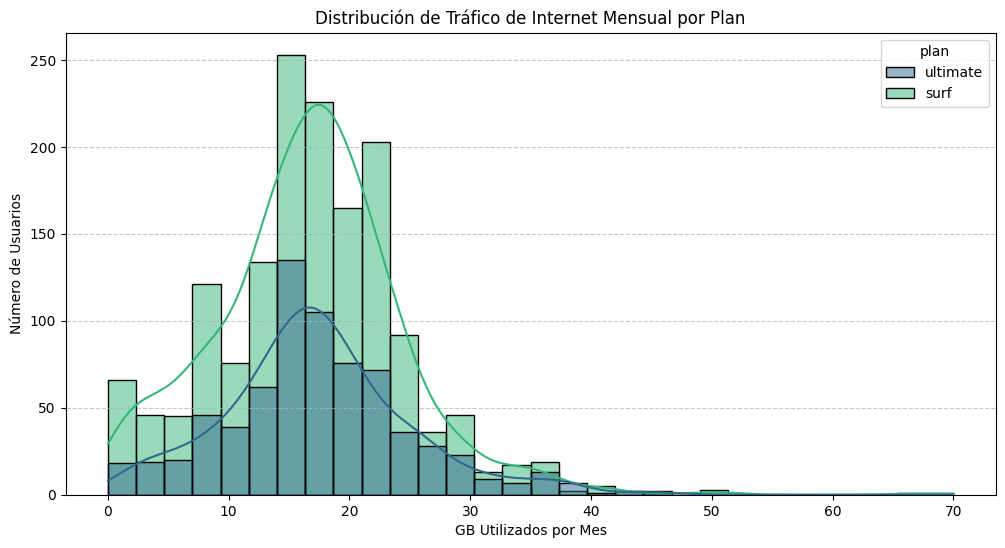

In [ ]:
# Compara el volumen de tráfico de Internet mensual que necesitan los usuarios de cada plan.
# Traza un histograma.
plt.figure(figsize=(12, 6))
sns.histplot(data=user_monthly_data, x='gb_used', hue='plan', kde=True, bins=30, palette='viridis') # Usando 'plan'
plt.title('Distribución de Tráfico de Internet Mensual por Plan')
plt.xlabel('GB Utilizados por Mes')
plt.ylabel('Número de Usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calcula la media y la varianza del volumen mensual de tráfico de Internet por plan
mean_gb_per_plan = user_monthly_data.groupby('plan')['gb_used'].mean()
variance_gb_per_plan = user_monthly_data.groupby('plan')['gb_used'].var()
std_gb_per_plan = user_monthly_data.groupby('plan')['gb_used'].std()

print("\nMedia de GB de Internet mensuales por plan:")
print(mean_gb_per_plan)
print("\n")

print("Varianza de GB de Internet mensuales por plan:")
print(variance_gb_per_plan)
print("\n")

print("Desviación estándar de GB de Internet mensuales por plan:")
print(std_gb_per_plan)
print("\n")


Media de GB de Internet mensuales por plan:
plan
surf        16.670693
ultimate    17.306944
Name: gb_used, dtype: float64


Varianza de GB de Internet mensuales por plan:
plan
surf        61.58360
ultimate    58.83055
Name: gb_used, dtype: float64


Desviación estándar de GB de Internet mensuales por plan:
plan
surf        7.847522
ultimate    7.670108
Name: gb_used, dtype: float64




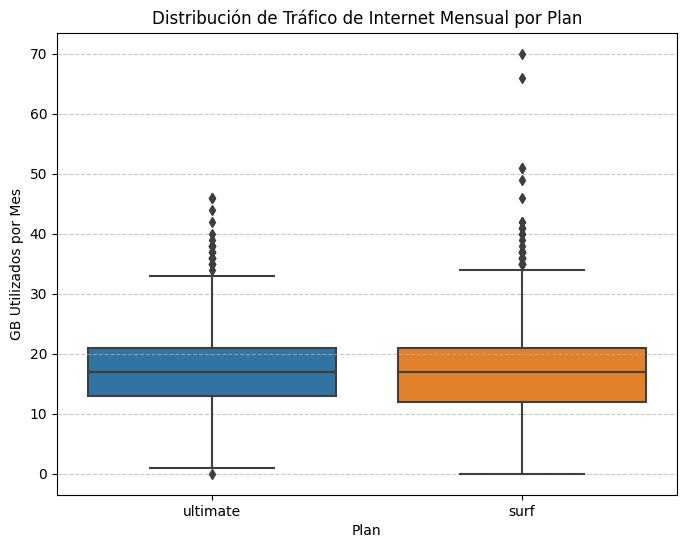

In [ ]:
# Traza un diagrama de caja para visualizar la distribución del volumen mensual de tráfico de Internet
plt.figure(figsize=(8, 6))

sns.boxplot(x='plan', y='gb_used', data=user_monthly_data)
plt.title('Distribución de Tráfico de Internet Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('GB Utilizados por Mes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Análisis del Comportamiento de Tráfico de Internet por Plan**

- **Gráfico de barras (Volumen Promedio Mensual):** El plan Ultimate muestra un promedio ligeramente superior de GB utilizados en la mayoría de los meses en comparación con Surf. Ambos planes tienen una tendencia ascendente en el uso de datos a lo largo del año, con los meses finales mostrando el mayor consumo.

- **Histograma (Distribución Mensual):** Ambas distribuciones están sesgadas a la derecha, indicando que la mayoría de los usuarios consume menos GB, con una cola de usuarios de alto consumo. La distribución para Surf tiene un pico alto entre 15-20 GB, mientras que Ultimate muestra una distribución más extendida y un poco más alta en los rangos promedio.

- **Estadísticas Descriptivas:** La media de GB es ligeramente más alta para Ultimate (17.31 GB vs 16.67 GB). La varianza y desviación estándar son muy similares para ambos planes (Surf 61.58 / 7.85; Ultimate 58.83 / 7.67), lo que indica una dispersión comparable en el uso de datos.

- **Diagrama de Caja (Boxplot):** Las medianas y los rangos intercuartílicos (IQR) son muy similares para ambos planes. Ambos planes presentan numerosos valores atípicos (outliers) de alto consumo de GB, lo que sugiere que hay usuarios con uso extremadamente alto en ambos grupos.

**Conclusión sobre el Comportamiento de Tráfico de Internet**

El análisis del uso de datos muestra un comportamiento **muy similar entre los usuarios de ambos planes (Surf y Ultimate).** Tanto el promedio como la mediana de GB consumidos son casi idénticos, y la variabilidad en el uso de datos es comparable. Si bien ambos planes tienen una mayoría de usuarios que no consumen volúmenes extremadamente altos, **ambos también presentan una cantidad significativa de usuarios con un consumo muy elevado (outliers).** La diferencia crucial, como en los mensajes y llamadas, radica en los límites del plan: los 15 GB de Surf son más fáciles de exceder que los 30 GB de Ultimate, lo que probablemente lleva a **más cargos por excedentes de datos para los usuarios de Surf.**

## Ingreso

Vamos a describir estadísticamente los ingresos generados por cada plan y, lo más importante, cómo difieren entre ellos.

**Estadísticas Descriptivas de los Ingresos Mensuales por Plan**

Comenzaremos calculando las estadísticas descriptivas básicas para la columna monthly_revenue, agrupando por plan. Esto nos dará una visión numérica de la media, varianza, desviación estándar, y los cuartiles de los ingresos de cada plan.

**Distribución de los Ingresos Mensuales por Plan (Histograma)**

Un histograma nos ayudará a visualizar cómo se distribuyen los ingresos generados por los usuarios en cada plan. Esto es clave para ver si la mayoría de los ingresos provienen del costo base o de los excedentes.

**Diagrama de Caja de los Ingresos Mensuales por Plan**

Un diagrama de caja nos dará una visión rápida de la mediana, la dispersión y la presencia de valores atípicos en los ingresos de cada plan.

In [ ]:
# Estadísticas descriptivas para los ingresos mensuales por plan
revenue_stats_per_plan = user_monthly_data.groupby('plan')['monthly_revenue'].agg(['mean', 'var', 'std', 'median', 'min', 'max']).reset_index()

print("Estadísticas descriptivas de los ingresos mensuales por plan:")
print(revenue_stats_per_plan)
print("-" * 70)

Estadísticas descriptivas de los ingresos mensuales por plan:
       plan       mean          var        std  median   min     max
0      surf  60.706408  3067.835152  55.388042   40.36  20.0  590.37
1  ultimate  72.313889   129.848486  11.395108   70.00  70.0  182.00
----------------------------------------------------------------------


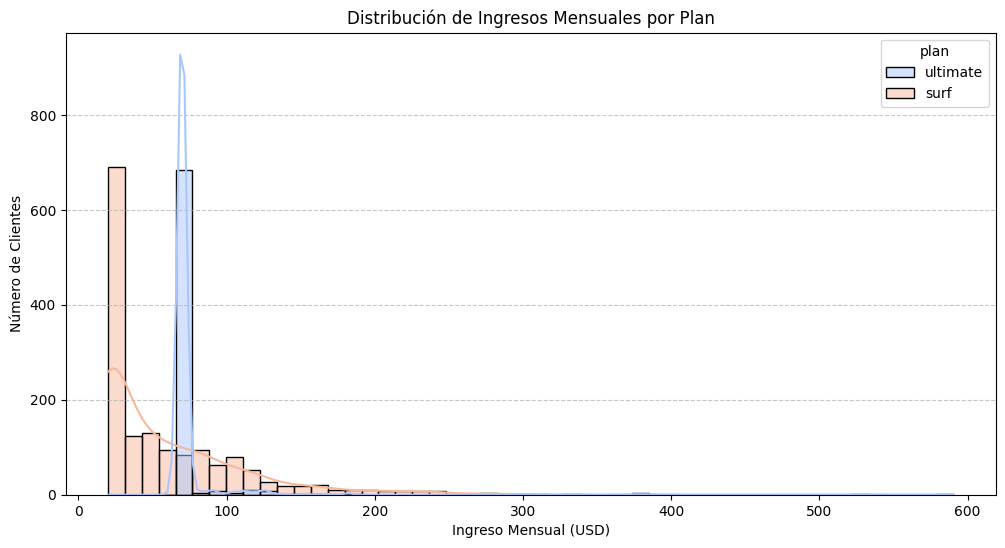

In [ ]:
# Histograma de la distribución de ingresos mensuales por plan
plt.figure(figsize=(12, 6))
sns.histplot(data=user_monthly_data, x='monthly_revenue', hue='plan', kde=True, bins=50, palette='coolwarm')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Ingreso Mensual (USD)')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

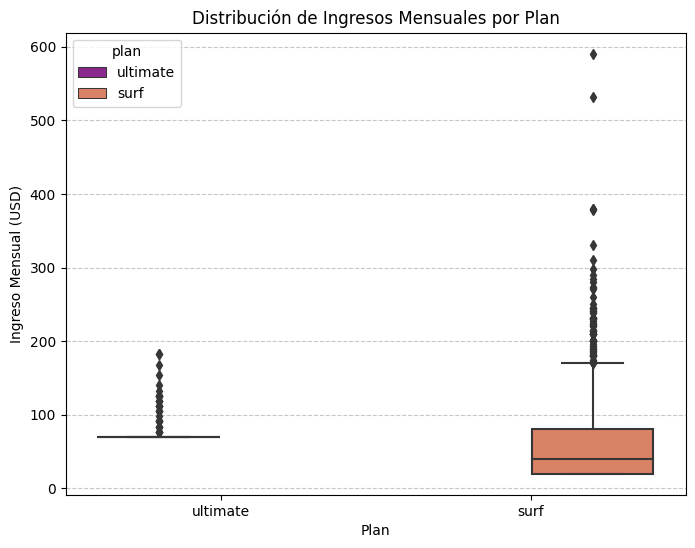

In [ ]:
# Diagrama de caja para la distribución de ingresos mensuales por plan
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='monthly_revenue', data=user_monthly_data, hue='plan', palette='plasma')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Análisis y Comparación de Ingresos Mensuales por Plan.**

Los ingresos difieren entre los planes Surf y Ultimate.
- El plan Ultimate genera ingresos consistentes y predecibles. La mayoría de sus usuarios no incurren en cargos adicionales, lo que resulta en baja variabilidad de ingresos por cliente. Su ingreso promedio es de 72.31 USD.
- El plan Surf, genera ingresos promedio significativamente más altos debido a los considerables cargos por uso adicional. Presenta una gran dispersión y volatilidad en sus ingresos, con muchos usuarios pagando montos muy por encima de la tarifa base por excedentes. Su mediana es de $40.36 USD. En resumen, Ultimate depende de su cuota fija, mientras que Surf genera la mayor parte de sus ingresos adicionales a través de los cobros por excedentes.

## Prueba las hipótesis estadísticas

Determinar si **el ingreso mensual promedio de los usuarios del plan Ultimate es diferente al de los usuarios del plan Surf.**

- **Hipótesis:**
    - Hipótesis Nula (H0): El ingreso promedio de ambos planes es el mismo.
    - Hipótesis Alternativa (H1): El ingreso promedio de los planes Ultimate y Surf es diferente.
- Prueba Elegida: **Prueba T** para dos muestras independientes. Se usa porque comparamos las medias de dos grupos de usuarios distintos y la variable (ingreso) es continua.

- Nivel de Significancia **(α): Se establece en 0.05.** Esto significa que aceptamos un 5% de riesgo de concluir que hay una diferencia cuando no la hay.
- Criterio de Decisión (con el **Valor P**):
    - Si el Valor P < 0.05: Rechazamos la Hipótesis Nula. La diferencia de ingresos es estadísticamente significativa.
    - Si el Valor P ≥ 0.05: No rechazamos la Hipótesis Nula. No hay evidencia suficiente para decir que la diferencia es significativa.
- Ejecución (código):
Se separarán los datos de ingresos por plan. Se realizará una **Prueba de Levene** para verificar si las varianzas de los grupos son similares.

In [ ]:
# 1. Separar los ingresos por plan
revenue_ultimate = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue']
revenue_surf = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue']

print(f"Tamaño de muestra Plan Ultimate: {len(revenue_ultimate)}")
print(f"Tamaño de muestra Plan Surf: {len(revenue_surf)}")

# 2. Prueba de Levene para homogeneidad de varianzas (H0: Las varianzas son iguales)
# Esto nos ayuda a decidir el parámetro 'equal_var' en la prueba T.
levene_statistic_plans, levene_pvalue_plans = st.levene(revenue_ultimate, revenue_surf)
print(f"\nPrueba de Levene para varianzas de ingresos (Ultimate vs. Surf):")
print(f"Estadístico de Levene: {levene_statistic_plans:.4f}")
print(f"P-valor de Levene: {levene_pvalue_plans:.4f}")

# Si el p-valor de Levene es menor que 0.05, las varianzas son diferentes (equal_var=False)
equal_variances_plans = levene_pvalue_plans > 0.05
print(f"¿Las varianzas de ingresos son iguales (Ultimate vs. Surf)? {'Sí' if equal_variances_plans else 'No'}")

# 3. Realizar la Prueba T para dos muestras independientes
# El parámetro 'equal_var' se establece en función del resultado de la Prueba de Levene.
ttest_statistic_plans, p_value_plans = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=equal_variances_plans)

print(f"\nPrueba T para ingresos (Ultimate vs. Surf):")
print(f"Estadístico T: {ttest_statistic_plans:.4f}")
print(f"P-valor: {p_value_plans:.4f}")

# Mostrar las medias para el contexto de la conclusión
print(f"Media de ingresos Plan Ultimate: ${revenue_ultimate.mean():.2f}")
print(f"Media de ingresos Plan Surf: ${revenue_surf.mean():.2f}")

# 4. Conclusión basada en el p-valor
print("\nConclusión de la prueba (Ingreso promedio Ultimate vs. Surf):")
if p_value_plans < 0.05:
    print("El p-valor es menor que 0.05. **Rechazamos la hipótesis nula.**")
    print("Esto significa que hay una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios del plan Ultimate y los del plan Surf.")
else:
    print("El p-valor es mayor o igual que 0.05. **No podemos rechazar la hipótesis nula.**")
    print("Esto significa que no hay suficiente evidencia estadística para afirmar que el ingreso promedio de los usuarios del plan Ultimate es diferente al de los usuarios del plan Surf.")

Tamaño de muestra Plan Ultimate: 720
Tamaño de muestra Plan Surf: 1573

Prueba de Levene para varianzas de ingresos (Ultimate vs. Surf):
Estadístico de Levene: 404.7302
P-valor de Levene: 0.0000
¿Las varianzas de ingresos son iguales (Ultimate vs. Surf)? No

Prueba T para ingresos (Ultimate vs. Surf):
Estadístico T: 7.9521
P-valor: 0.0000
Media de ingresos Plan Ultimate: $72.31
Media de ingresos Plan Surf: $60.71

Conclusión de la prueba (Ingreso promedio Ultimate vs. Surf):
El p-valor es menor que 0.05. **Rechazamos la hipótesis nula.**
Esto significa que hay una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios del plan Ultimate y los del plan Surf.


**El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.**

- Hipótesis:
    - Hipótesis Nula (H0): El ingreso promedio de los usuarios de Nueva York-Nueva Jersey es el mismo que el de los usuarios de otras regiones.
    - Hipótesis Alternativa (H1): El ingreso promedio de los usuarios de Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

- Nivel de Significancia **(α): Se establece en 0.05.** Esto significa que aceptamos un 5% de riesgo de concluir que hay una diferencia cuando no la hay.

- Prueba Elegida: **Prueba T** para dos muestras independientes. Se usa porque comparamos las medias de dos grupos de usuarios distintos (NY-NJ vs. Otras Regiones) y la variable (ingreso) es continua.

- Criterio de Decisión (con **el Valor P**):
    - Si el Valor P < 0.05: Rechazamos la Hipótesis Nula. La diferencia de ingresos es estadísticamente significativa.
    - Si el Valor P ≥ 0.05: No rechazamos la Hipótesis Nula. No hay evidencia suficiente para decir que la diferencia es significativa.

- Ejecución (código): Se separarán los datos de ingresos por región (NY-NJ vs. Otras). Se realizará una Prueba de Levene para verificar si las varianzas de los grupos son similares.

In [ ]:
# Combinar la informacion de city a df_users en user_monthly_data
user_monthly_data = pd.merge(user_monthly_data, df_users[['user_id', 'city']], on='user_id', how='left')

# Paso 1: Separar los datos en dos grupos
# Usuarios de Nueva York y Nueva Jersey
# Extraer state de la columna city
user_monthly_data['state'] = user_monthly_data['city'].apply(lambda x: x.split(', ')[-1].split(' ')[0])

# Grupo 1: Usuarios de NY-NJ
# Filtramos por los estados 'NY' y 'NJ'
revenue_ny_nj = user_monthly_data[user_monthly_data['state'].isin(['NY', 'NJ'])]['monthly_revenue']

# Grupo 2: Usuarios de otras regiones
# Filtramos por todos los estados que NO son 'NY' ni 'NJ', y que no son nulos
revenue_other_regions = user_monthly_data[~user_monthly_data['state'].isin(['NY', 'NJ']) & user_monthly_data['state'].notnull()]['monthly_revenue']


# Imprimir tamaños de muestra para verificar si hay datos en ambos grupos
print(f"\nNúmero de usuarios en NY-NJ: {len(revenue_ny_nj)}")
print(f"Número de usuarios en Otras Regiones: {len(revenue_other_regions)}")

# Manejar el caso donde uno de los grupos podría estar vacío
if len(revenue_ny_nj) == 0 or len(revenue_other_regions) == 0:
    print("\n¡ADVERTENCIA: Uno o ambos grupos de ingresos están vacíos o tienen datos insuficientes para la prueba T!")
    if len(revenue_ny_nj) == 0:
        print("El grupo de usuarios de NY-NJ está vacío. Revisa la lógica de extracción de 'state' y el filtro.")
    if len(revenue_other_regions) == 0:
        print("El grupo de usuarios de Otras Regiones está vacío. Revisa la lógica de extracción de 'state' y el filtro.")
    print("No se puede realizar la Prueba T en estas condiciones.")
else:
    # 5. Realizar la Prueba de Levene para homogeneidad de varianzas
    levene_statistic_ny_nj, levene_pvalue_ny_nj = st.levene(revenue_ny_nj, revenue_other_regions)
    print(f"\nResultado de la Prueba de Levene (NY-NJ vs. Otras Regiones):")
    print(f"Estadístico de Levene: {levene_statistic_ny_nj:.4f}")
    print(f"P-valor de Levene: {levene_pvalue_ny_nj:.4f}")

    equal_variances_ny_nj = levene_pvalue_ny_nj > 0.05
    print(f"¿Las dispersiones de ingresos son similares (NY-NJ vs. Otras Regiones)? {'Sí' if equal_variances_ny_nj else 'No'}")

    # 6. Realizar la Prueba T para dos muestras independientes
    ttest_statistic_ny_nj, p_value_ny_nj = st.ttest_ind(revenue_ny_nj, revenue_other_regions, equal_var=equal_variances_ny_nj)

    print(f"\nResultado de la Prueba T (NY-NJ vs. Otras Regiones):")
    print(f"Estadístico T: {ttest_statistic_ny_nj:.4f}")
    print(f"Valor P: {p_value_ny_nj:.4f}")

    # Mostrar las medias para el contexto de la conclusión
    print(f"Ingreso Promedio NY-NJ: ${revenue_ny_nj.mean():.2f}")
    print(f"Ingreso Promedio Otras Regiones: ${revenue_other_regions.mean():.2f}")

    # 7. Conclusión basada en el p-valor
    print("\nConclusión de la prueba (Ingreso promedio NY-NJ vs. Otras Regiones):")
    if p_value_ny_nj < 0.05:
        print("El Valor P es menor que 0.05. **Rechazamos la hipótesis nula.**")
        print("Esto significa que hay una diferencia estadísticamente significativa en el ingreso promedio entre los usuarios de Nueva York-Nueva Jersey y los de otras regiones.")
    else:
        print("El Valor P es igual o mayor que 0.05. **No podemos rechazar la hipótesis nula.**")
        print("Esto significa que no hay suficiente evidencia estadística para afirmar que el ingreso promedio de los usuarios de Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.")


Número de usuarios en NY-NJ: 29
Número de usuarios en Otras Regiones: 2264

Resultado de la Prueba de Levene (NY-NJ vs. Otras Regiones):
Estadístico de Levene: 7.9049
P-valor de Levene: 0.0050
¿Las dispersiones de ingresos son similares (NY-NJ vs. Otras Regiones)? No

Resultado de la Prueba T (NY-NJ vs. Otras Regiones):
Estadístico T: 0.8902
Valor P: 0.3808
Ingreso Promedio NY-NJ: $73.69
Ingreso Promedio Otras Regiones: $64.23

Conclusión de la prueba (Ingreso promedio NY-NJ vs. Otras Regiones):
El Valor P es igual o mayor que 0.05. **No podemos rechazar la hipótesis nula.**
Esto significa que no hay suficiente evidencia estadística para afirmar que el ingreso promedio de los usuarios de Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.


## Conclusión General del Análisis de Datos de Megaline

Análisis:

**Comportamiento de Ingresos por Plan:**
- Diferencia Significativa: Existe una diferencia estadísticamente significativa en el ingreso promedio mensual entre los planes Ultimate y Surf (P-valor: 0.0000).
- Ultimate es más Rentable: El Plan Ultimate (72.31) genera un ingreso promedio significativamente más alto que el Plan Surf ($60.71).
- Variabilidad de Ingresos: Los ingresos del Plan Ultimate son más consistentes y predecibles (baja variabilidad), mientras que los del Plan Surf muestran una gran dispersión y volatilidad, impulsados por los cargos por excedentes en minutos, mensajes y datos.

**Comportamiento de Ingresos por Región (NY-NJ vs. Otras Regiones):**
- Sin Diferencia Significativa: No hay evidencia estadística suficiente (P-valor: 0.3808) para afirmar que el ingreso promedio de los usuarios de Nueva York-Nueva Jersey (73.69) es diferente al de los usuarios de otras regiones ($64.23).
- Dispersión de Ingresos: Las dispersiones de ingresos entre NY-NJ y otras regiones no son similares (P-valor de Levene: 0.0050).

**Recomendaciones Estratégicas:**
- Promover el Plan Ultimate: Megaline debería priorizar y enfocar sus esfuerzos de marketing en promover activamente el Plan Ultimate, dada su mayor rentabilidad y previsibilidad por usuario.
- Análisis del Modelo Surf: Es crucial un análisis más profundo del Plan Surf para identificar el perfil de usuarios que generan altos cargos por excedentes. Se podrían ofrecer actualizaciones de plan a estos usuarios o ajustar las políticas de excedentes para maximizar la rentabilidad y mejorar la satisfacción del cliente.

Estrategias No Regionales: Las estrategias de pricing y marketing general pueden aplicarse de manera uniforme en todo el país, ya que la ubicación NY-NJ no demuestra ser un factor determinante en el ingreso promedio.